### Python scraping

```
personal notebook about webscraping using Selenium, beautifiul soup , and normal http lib request.

A website has 3 main components , html for contents, javascript for interaction, css for style.

Why scraping: Automate data gathering

css selectors: id, tags and classes.
tags is for example <p> , which css can find using p {}
<p id="mijnid"> can be found using #id . 
<p class="mijnclass"> can be found using .mijnclass , and is used for many tags with the same class.

To debug: open Chrome , and go to inspect components on the website
In console use $$(".name") to find css tags to verify/debug your finding.

In console open your item to see all attributes. 
use :
[...$$(".yourname")].forEach( (e) =>: { } ];

it shows your attribute.


to scrape install selnium:
python -m pip install selenium
Also a webdriver (chrome driver) can be used to test websites. In the end we will just use a aorchestration tool which call our scraping tool periodically. But before that moment we will use chromedriver to research the website using code
```

In [189]:
#settings
#main_project_url="https://github.com/michelnossin/python-scraping/commits/master"
#main_project_url="https://github.com/michelnossin/pandaweb/commits/master"
main_project_url="https://github.com/Schiphol-Hub/dil_scripts/commits/master"
#main_project_url="https://github.com/michelnossin/commander/commits/master"

In [106]:
from selenium import webdriver
browser = webdriver.Chrome("/Users/michelnossin/Downloads/chromedriver")

#browser.get(main_project_url)
#browser.execute_script("alert('hello michel')")
#input.send_keys("some input text for input box")
#input.clear()

In [110]:
import time
import numpy as np
import pandas as pd

def _retrieve_df_commitinfo ():
    'Retreive a Pandas dataframe with commits in a git project from current level'

    dates = browser.find_elements_by_css_selector(".commit-meta")
    titles = browser.find_elements_by_css_selector(".commit-title")
    authors = browser.find_elements_by_css_selector(".commit-author")
    alist = [a.text for a in authors]
    tlist = [t.text for t in titles]
    dlist = [d.text for d in dates]
    dat = zip(dlist,alist,tlist)
    dat = [list(a) for a in dat]
    df = pd.DataFrame(dat)
    
    #Go to next page with commits on git
    deeper_list = pd.DataFrame()
    try:
        older_button = browser.find_element_by_css_selector(".pagination a")
        older_button.click()
        time.sleep(0.5)
    
        deeper_list = retrieve_lists_commitinfo()
    except:
        return df
     
    return pd.concat([df, deeper_list])

def get_commits_project(project_url):
    'get pandas dataframe with commits from given project url'
    browser.get(project_url)
    results = _retrieve_df_commitinfo()
    results.columns = ['date', 'commiter','title']
    return results

In [111]:

get_commits_project(main_project_url)

,date,commiter,title
0,michelnossin committed on Dec 17 2016,michelnossin,update readme
1,michelnossin committed on Dec 17 2016,michelnossin,"Created python backend, using it frontend has ..."
2,michelnossin committed on Dec 17 2016,michelnossin,Change readme
3,michelnossin committed on Dec 17 2016,michelnossin,"Frontend is also hosted by nodejs, changed sam..."
4,michelnossin committed on Dec 14 2016,michelnossin,"replaced complete backend to REST api, only no..."
5,michelnossin committed on Dec 11 2016,michelnossin,Created jsonrpc based server and client exampl...
6,michelnossin committed on Dec 10 2016,michelnossin,"Added sample Python backend, and test frontend..."
7,michelnossin committed on Dec 7 2016,michelnossin,changed readme
8,michelnossin committed on Dec 7 2016,michelnossin,changed readme
9,michelnossin committed on Dec 7 2016,michelnossin,first commit


To Browse to multiple pages, you can find the button in the same matter,
and use .click() to push next. If a button does no have a css selector,
but it sits in a another item like a span tag, you can use e.g. $$(".span a") in chrome to find the link item in a span item.

### urllib , request and wget

To getr data pure within python, without web driver on client

In [113]:
#Use request to get html
import requests
url ="http://nos.nl"
response = requests.get(url)
html = response.text
#print(html)

#Adding header like this:
header = { "From":"my name"}
response = requests.het(url,headers=header)
if response.status_code != 200:
    print("problem",response.status_code,response.reason)
    exit()

In [116]:
#OR use urllib
import urllib.request
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
html = response.read()
#print(html)

```
to prevent load on website.
wget <html file>
Open file using local browser, and debug this file
```

In [ ]:
#to open wget file
file = "myfile.html"
with open(file,encoding="utf-8") as f:
    html = f.read()
    
print (html)
    

Client side website might not show all data as the source code is not the same as what you see on your client browser

### Beautiful Soup to parse

python pip -m BeautifulSoup4


In [146]:
from bs4 import BeautifulSoup

html = "<p id='myid'>michel</p><p class='myclass'>hallo</p>"  #as is parser
soup = BeautifulSoup(html,"html.parser")


In [136]:
#Error. Acts more like browsers, so will add html to make page valid, like body 
import html5lib
#parser = html5lib.HTMLParser(tree=html5lib.getTreeBuilder("dom"))

#soup = BeautifulSoup(html, "html5lib") #install using pip install html5lib


In [143]:
soup.find_all("p")

[<p>michel</p>, <p class="myclass">hallo</p>]

In [139]:
soup.find_all(["th","td"])

[]

In [145]:
soup.find_all(class_="myclass")

[<p class="myclass">hallo</p>]

In [157]:
import re
soup.find_all(id=re.compile("^myid"))

[<p id="myid">michel</p>]

Use select or select_one is more clear, clean , precise syntax

In [148]:
soup.select("p")

[<p id="myid">michel</p>, <p class="myclass">hallo</p>]

In [149]:
soup.select("th,td")

[]

In [150]:
soup.select(".myclass")

[<p class="myclass">hallo</p>]

In [155]:
#soup.select("[id=myid]")
soup.select("[id^=myid]")

[<p id="myid">michel</p>]

```
All these methods return objects not strings, so use:
tag.parent, tag.find_parent("div")
tag.children , tag.select("div")
tag.find_next_sibling(), tag.find_previous_siblings()
```


In [159]:
p = soup.select_one("p")
p

<p id="myid">michel</p>

In [160]:
p = p.find_next_sibling()
p

<p class="myclass">hallo</p>

In [161]:
p.contents #contents give strings

['hallo']

In [165]:
p.attrs #Get attributes for any tag 
p["newattr"] = " Michel" #its a dict, and dicts are writable
p.attrs

#MEga tip: use css selectors, dont use python for parsing

{'class': ['myclass'], 'newattr': ' Michel'}

### Dont scrape if there are other sources like API's

In [167]:
#url Query string http;/klm.nl?param1=bla&param2=jaja
#Json (or xml)is returned

import requests
resp = requests.get("https://api.ip2country.info/ip?184.68.182.250")
resp

<Response [200]>

In [168]:
resp.content

b'{\n\t"countryCode": "CA",\n\t"countryCode3": "CAN",\n\t"countryName": "Canada",\n\t"countryEmoji": "\xf0\x9f\x87\xa8\xf0\x9f\x87\xa6"\n}\n'

In [169]:
obj = resp.json()
obj

{'countryCode': 'CA',
 'countryCode3': 'CAN',
 'countryEmoji': '🇨🇦',
 'countryName': 'Canada'}

In [172]:
#nw lets use open-notify.org with urllib
import urllib.request,json
resp = urllib.request.urlopen("http://api.open-notify.org/iss-now.json")
s= resp.read()
s

b'{"iss_position": {"latitude": "16.4397", "longitude": "102.2857"}, "message": "success", "timestamp": 1495288498}'

In [174]:
obj = json.loads(s.decode("utf8"))
obj.get("iss_position").get("longitude") #get will return None instead of error

'102.2857'

In [175]:
#Or use requests (prefered)
import requests
resp = requests.get("http://api.open-notify.org/iss-now.json")
obj = resp.json()
obj

{'iss_position': {'latitude': '26.8306', 'longitude': '111.4729'},
 'message': 'success',
 'timestamp': 1495288714}

In [187]:
#With params
import requests
parameters = {"lon":-79,"lat":45}
resp=requests.get("http://klm.nl",params=parameters)
resp
myjson = obj

In [188]:
#resp.content
import pprint
pprint.pprint(myjson)

{'iss_position': {'latitude': '26.8306', 'longitude': '111.4729'},
 'message': 'success',
 'timestamp': 1495288714}


### Bonus : how to login


<!DOCTYPE html>
<html>
  <head>
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta http-equiv="Content-Security-Policy" content="default-src 'none'; base-uri 'self'; connect-src 'self'; form-action 'self'; img-src data:; script-src 'self'; style-src 'unsafe-inline'">
    <meta content="origin" name="referrer">
    <title>Oh no &middot; GitHub</title>
    <style type="text/css" media="screen">
      body {
        background-color: #f1f1f1;
        margin: 0;
        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
      }

      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }

      a { color: #4183c4; text-decoration: none; }
      a:hover { text-decoration: underline; }

      h1 { letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px; text-shadow: 0 1px 0 #fff; }
      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0 40px; }

      ul { list-style: none; margin: 25px 0; padding: 0
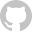
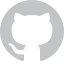

In [203]:
#does not work yet
import requests

# Fill in your details here to be posted to the login form.
params = {
    'user': 'bla',
    'password': 'bla'
}

# Use 'with' to ensure the session context is closed after use.
with requests.Session() as s:
    res = s.post('https://github.com/login',params)
    #res = s.post(main_project_url,cookies=res.cookies)
    #print(res.cookies.get_dict())
    res = s.post(main_project_url,cookies=res.cookies.get_dict())    # print the html returned or something more intelligent to see if it's a successful login page.
    print (res.text)



    